In [66]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv('/Users/heyunyu/Desktop/5500_assignment4/NYPD_Motor_Vehicle_Collisions.csv',dtype=({'ZIP CODE': str}))

In [68]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [82]:
df.columns=df.columns.map(lambda x: x.lower())

In [70]:
df['date']=df['date']+' '+df['time']

In [71]:
df['date']=pd.to_datetime(df['date'])

In [72]:
date_start=pd.to_datetime('2017-11-17')

In [73]:
df=df[df['date']>=date_start]

In [74]:
df['dow']=df.date.dt.dayofweek
df['hour']=df.date.dt.hour
df['month']=df.date.dt.month

In [34]:
df.head()

,date,time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,...,unique key,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5,dow,hour,Day of Week,month
0,2018-11-16 00:10:00,0:10,MANHATTAN,10010,40.742275,-73.988914,"(40.742275, -73.988914)",5 AVENUE,BROADWAY,NaN,...,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,4,0,weekdays,11
1,2018-11-16 00:40:00,0:40,NaN,NaN,40.762720,-73.728170,"(40.76272, -73.72817)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN,4,0,weekdays,11
2,2018-11-16 00:45:00,0:45,BROOKLYN,11211,40.710197,-73.958430,"(40.710197, -73.95843)",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,4021791,Taxi,Taxi,NaN,NaN,NaN,4,0,weekdays,11
3,2018-11-16 01:00:00,1:00,BRONX,10454,40.803555,-73.911840,"(40.803555, -73.91184)",EAST 137 STREET,WILLOW AVENUE,NaN,...,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,4,1,weekdays,11
4,2018-11-16 01:00:00,1:00,BROOKLYN,11221,40.694923,-73.915565,"(40.694923, -73.915565)",WILSON AVENUE,PALMETTO STREET,NaN,...,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,4,1,weekdays,11


In [75]:
def map_week(x):
    if x in [1,2,3,4,5]:
        return('weekdays')
    else:
        return('weekends')

In [76]:
df['Day of Week']=df.dow.apply(map_week)

In [77]:
df.to_csv('collision_nyc.csv',index=False)

In [78]:
df.columns

Index(['date', 'time', 'borough', 'zip code', 'latitude', 'longitude',
       'location', 'on street name', 'cross street name', 'off street name',
       'number of persons injured', 'number of persons killed',
       'number of pedestrians injured', 'number of pedestrians killed',
       'number of cyclist injured', 'number of cyclist killed',
       'number of motorist injured', 'number of motorist killed',
       'contributing factor vehicle 1', 'contributing factor vehicle 2',
       'contributing factor vehicle 3', 'contributing factor vehicle 4',
       'contributing factor vehicle 5', 'unique key', 'vehicle type code 1',
       'vehicle type code 2', 'vehicle type code 3', 'vehicle type code 4',
       'vehicle type code 5', 'dow', 'hour', 'month', 'Day of Week'],
      dtype='object')

In [79]:
df.columns=df.columns.map(lambda x: x.upper())

In [80]:
df.to_csv('nypd.csv',index=False)

In [92]:
injured = [x for x in df.columns if 'injured' in x]
killed = [x for x in df.columns if 'killed' in x]
df['severity'] = 'No injuries' 
df.loc[df[killed].sum(axis=1)>0,'severity'] = 'Fatal'
df.loc[(df[killed].sum(axis=1)==0)&(df[injured].sum(axis=1)>0),'severity'] = 'Injured'
df.severity.value_counts()

No injuries    183920
Injured         44549
Fatal             213
Name: severity, dtype: int64

Text(0.5,0,'# reported')

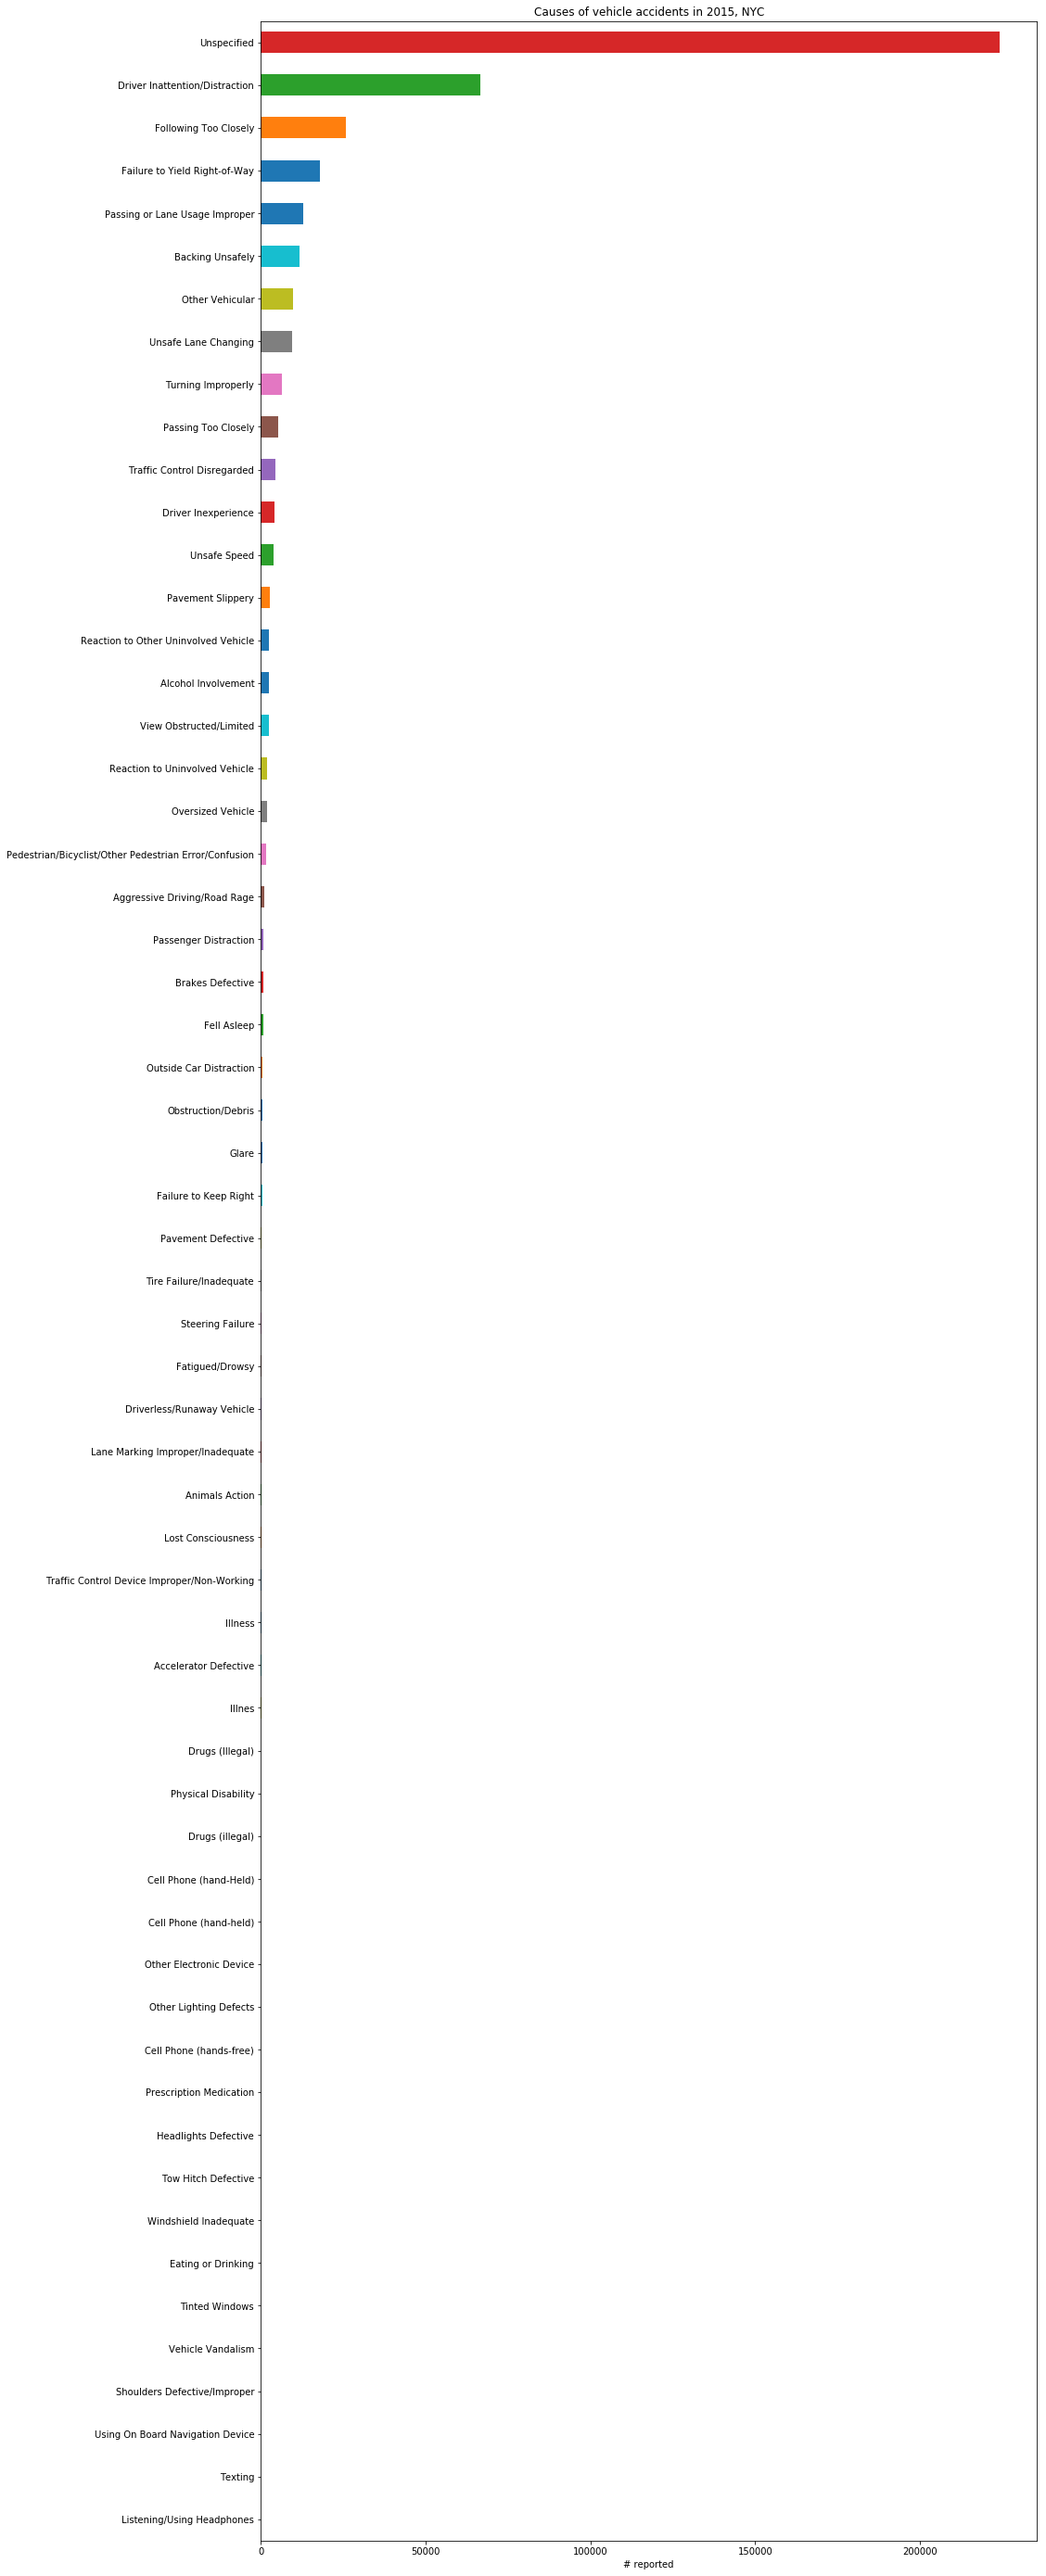

In [85]:
factors = [x for x in df.columns if 'factor' in x]
fig, ax = plt.subplots(figsize=(15,50))
d = df.copy()
d = pd.DataFrame([d.loc[:,x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=True)
d.plot(kind='barh',ax=ax)
ax.set_title('Causes of vehicle accidents in 2015, NYC')
ax.set_xlabel('# reported')

In [88]:
d

,0
Listening/Using Headphones,2.0
Texting,5.0
Using On Board Navigation Device,7.0
Shoulders Defective/Improper,8.0
Vehicle Vandalism,10.0
Tinted Windows,11.0
Eating or Drinking,12.0
Windshield Inadequate,13.0
Tow Hitch Defective,13.0
Headlights Defective,16.0


In [55]:
factors = [x for x in df.columns if 'factor' in x]
d = df[factors].join(df.severity)
s0 = pd.DataFrame([d.loc[d.severity=='No injuries',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)
s1 = pd.DataFrame([d.loc[d.severity=='Injured',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)
s2 = pd.DataFrame([d.loc[d.severity=='Fatal',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)

In [56]:
s0,s1,s2

(Unspecified                                              184099.0
 Driver Inattention/Distraction                            53257.0
 Following Too Closely                                     20250.0
 Failure to Yield Right-of-Way                             12003.0
 Passing or Lane Usage Improper                            11548.0
 Backing Unsafely                                          10749.0
 Unsafe Lane Changing                                       8644.0
 Other Vehicular                                            8130.0
 Turning Improperly                                         5445.0
 Passing Too Closely                                        4971.0
 Driver Inexperience                                        3379.0
 Traffic Control Disregarded                                2699.0
 Unsafe Speed                                               2358.0
 Pavement Slippery                                          2145.0
 Reaction to Other Uninvolved Vehicle                       20

In [62]:
for x in df.columns:
    if 'injured' in x:
        print(x)

number of persons injured
number of pedestrians injured
number of cyclist injured
number of motorist injured


In [86]:
# s0=pd.DataFrame(s0)
# s1=pd.DataFrame(s1)
# s2=pd.DataFrame(s2)
d=pd.DataFrame(d)

In [89]:
# s0.to_csv('no_injury.csv')
# s1.to_csv('injury.csv')
# s2.to_csv('death.csv')
d.to_csv('factors_.csv')

In [59]:
df[['number of persons injured', 'number of persons killed',
       'number of pedestrians injured', 'number of pedestrians killed',
       'number of cyclist injured', 'number of cyclist killed',
       'number of motorist injured', 'number of motorist killed']]

,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed
0,0.0,0.0,0,0,0,0,0,0
1,0.0,0.0,0,0,0,0,0,0
2,4.0,0.0,0,0,0,0,4,0
3,0.0,0.0,0,0,0,0,0,0
4,0.0,0.0,0,0,0,0,0,0
5,1.0,0.0,1,0,0,0,0,0
6,0.0,0.0,0,0,0,0,0,0
7,0.0,0.0,0,0,0,0,0,0
8,0.0,0.0,0,0,0,0,0,0
9,1.0,0.0,1,0,0,0,0,0


In [65]:
df['number of persons injured'].max()

22.0

In [64]:
df[killed].sum(axis=1).max()

4.0

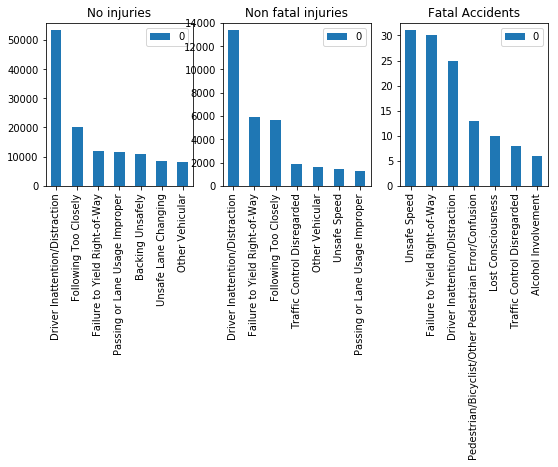

In [93]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(131 )
ax.set_title('No injuries')
s0[1:8].plot(kind='bar',ax=ax)
ax = fig.add_subplot(132 )
ax.set_title('Non fatal injuries')
s1[1:8].plot(kind='bar',ax=ax)
ax = fig.add_subplot(133 )
ax.set_title('Fatal Accidents')
s2[1:8].plot(kind='bar',ax=ax)

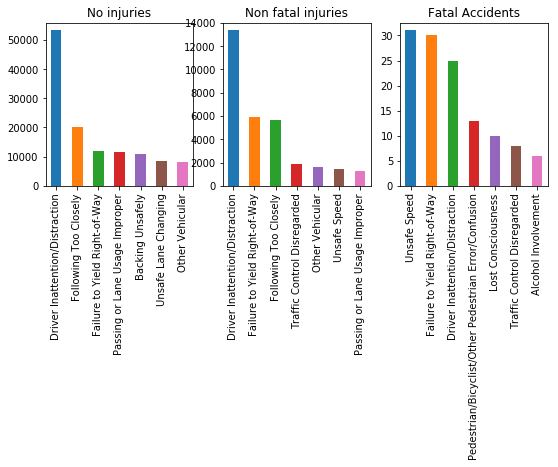

In [94]:
factors = [x for x in df.columns if 'factor' in x]
d = df[factors].join(df.severity)
s0 = pd.DataFrame([d.loc[d.severity=='No injuries',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)
s1 = pd.DataFrame([d.loc[d.severity=='Injured',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)
s2 = pd.DataFrame([d.loc[d.severity=='Fatal',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)

fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(131 )
ax.set_title('No injuries')
s0[1:8].plot(kind='bar',ax=ax)
ax = fig.add_subplot(132 )
ax.set_title('Non fatal injuries')
s1[1:8].plot(kind='bar',ax=ax)
ax = fig.add_subplot(133 )
ax.set_title('Fatal Accidents')
s2[1:8].plot(kind='bar',ax=ax)